In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
df=pd.DataFrame(iris["data"],columns=iris['feature_names'])
df["target"]=iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
from sklearn.model_selection import train_test_split
#train_test_split-->(訓練90%,測試10%,訓練標籤90%,測試標籤10%)
x_train,x_test,y_train,y_test=train_test_split(df.drop(["target"],axis=1),df["target"],test_size=0.10)#(資料集,標籤,測試比例)
from sklearn.cluster import KMeans
clu= KMeans(n_clusters=3)#已知種類，即為k
clu.fit(x_train)

KMeans(n_clusters=3)

In [5]:
clu.labels_

array([2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1,
       0, 1, 2])

In [7]:
from sklearn.metrics import silhouette_score
x=df.drop(["target"],axis=1)
plotx=[]
ploty=[]
for k in range(2,6):
    clu= KMeans(n_clusters=k)
    clu.fit(x)
    s=silhouette_score(x,clu.labels_)
    plotx.append(k)
    ploty.append(s)
print("k值:",plotx)
print("score:",ploty)

k值: [2, 3, 4, 5]
score: [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048]


Text(0, 0.5, 'silhouette_score')

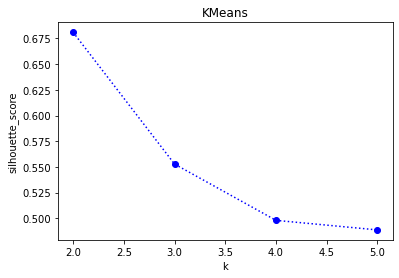

In [9]:
plt.plot(plotx,ploty,"bo:")
plt.title("KMeans")
plt.xlabel("k")
plt.ylabel("silhouette_score")